<a href="https://colab.research.google.com/github/arshadshk/Deep-Learning-with-TensorFlow/blob/master/krill_lstm_googlestock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Google stock price

# predicting the movenet as upward or downward

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as pt

In [0]:
df_tr = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [9]:
df_tr.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
#pt.line( df_test,   x='Date', y='Open')

In [16]:
# pd column to numpy array

training_set = df_tr.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


## Feature scaling

In [17]:
"""
standardixzation  =  x - mean /  std

normalization = x -min / max - min

RNN , if  sigmoid in output ot is recommended to use normalization
"""

from sklearn.preprocessing  import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0:5,0])

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225]


## Creating a datastructure for RNN

In [0]:
### AUthor tried different timestamps and got 60 gives best results.

In [22]:
X_train = []
y_train = []

for i in range(60,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

# list fo array

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape,y_train.shape)

(1198, 60) (1198,)


In [26]:
# Rehsaping the data  For keras input
X_train = np.reshape(X_train  ,(X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(1198, 60, 1)


## Model building_ stacked RNN with droupout regularization

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [0]:
# Initializing the RNN
regressor = Sequential()

# Adding layers
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [32]:
# Compiling the model
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [33]:
# Fitting the model to the trainingset
regressor.fit(X_train , y_train, epochs=100 , batch_size=32 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 19s 15ms/step - loss: 0.0435
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0039
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0035
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================]

## Making the predictions and vizualizing the results

In [0]:
real_stock_price = df_test.iloc[:,1:2].values

In [60]:
dataset_total = pd.concat( (df_tr['Open'],df_test['Open']) , axis= 0 )
inputs = dataset_total[len(dataset_total) - len(df_test) - 60 : ].values
inputs = inputs.reshape((-1,1))

inputs = sc.transform(inputs)          ## scaling
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i , 0])
X_test = np.array(X_test)

X_test= np.reshape(X_test, (X_test.shape[0] ,X_test.shape[1] , 1))
print(X_test.shape[0])

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

20


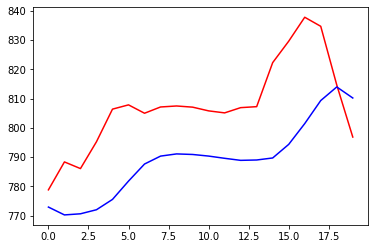

In [62]:
# vizualizing the results
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color = 'red' ,label ='Real google stockprice' )
plt.plot(predicted_stock_price, color = 'blue' ,label ='Predicted google stockprice' )

In [0]:
from keras.models import save_model

In [0]:
save_model(regressor, 'gogle.h5')